<a href="https://colab.research.google.com/github/rwiederblank/Turtle_Village_Ruchama_Wiederblank/blob/main/TurtleVillage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

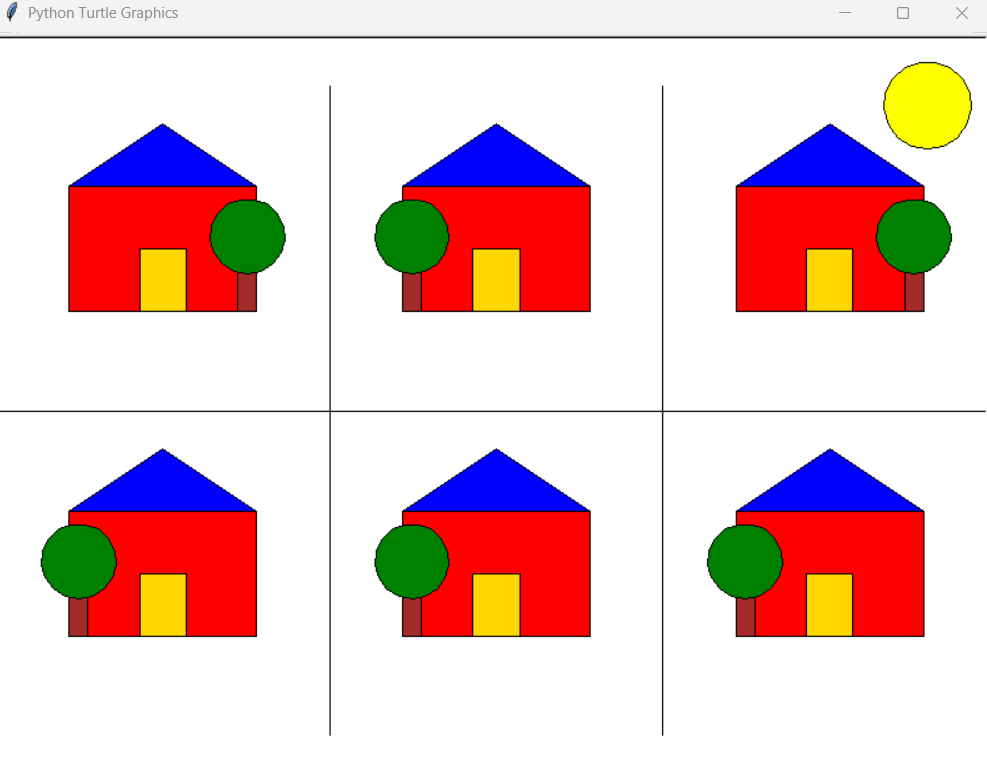

Reflection:


*   I used while loops for all situations that would run an indeffinate amount of times. For example, in the

```
ask_choice_int(prompt, allowed)
```
  and the

```
ask_choice_str(prompt, allowed)
```
  I used while loops, since I wanted it to repeat the prompt until the user entered a valid input option. Since I did not know how many times that would be, I used a while loop. However, for anything that I knew exactly how many times it would run, I used a for loop. For example, any time that I looped through all the rows or columns, or make a rectangle, or square, since I knew the exact number of times i wanted to itterate.





*   Any time that user input was required, I used a try / except. These were important to ensure that the input would not raise a ValueError (if the requested input was an int and the user entered a string). Another thing I had to gaurd against was the user entering something that was not one of the allowed options, even if it was teh correct type. For example, an invalid house size or a roof type or color theme that was not one of the options.


*   I tried to adhere to PEP 8 since it gives the code a uniform and organised look. The only time I may have bended pep 8 was in a variable or equation with a lot of numbers, which I thought would benafit from more or less whitespace than allowed to make it easier to read. Otherwise I tried to adhere completly to the PEP 8 guidelines.





In [ ]:
"""
Turtle Village
Ruchama Wiederblank
10/23/2025

Pseudocode:
Note - some functions and variables were already given - this is the code that I add myself

1. create the function ask_choice_int(prompt, allowed)
    * takes in the question and an array of the allowed answers
    * makes sure that the user input is an allowed option, reprompts if not

2. create the function ask_choice_str(prompt, allowed)
    * takes in the question and an array of the allowed answers
    * makes sure that the user input is an allowed option, reprompts if not

3. create the function draw_roads(cols, rows, cell_w, cell_h)
    * takes in the number of columns and the number of rows
    * takes in the cell width and the cell height
    * uses a for loop to loop through everything from 1 until the number of rows - 1, and draws horizontal lines
    * uses a for loop to loop through everything from 1 until the number of columns - 1, and draws vertical lines
    * left with a grid of lines based on cols and rows

4. create the function draw_house_centered(cx, cy, size_key, theme_key, roof_style)
    * draws a box centered at (cx, cy) by implementing fill_rect_center(cx, cy, w, h, body_c) [given]
    * create an if statement:
        - if the roof type the user wants is triangle:
            ~ implement fill_triangle(p1, p2, p3, color) [given] to create a triangle on top of the square
        - else if the roof type is flat:
            ~ implement fill_rect_center(cx, cy, w, h, body_c) to create a flat rectangle over the square, as the roof

5. create the function draw_tree_near(cx, cy, size_key)
    * draws a rectangle in proportion to, and next to the house = the trunk
    * draws a circle on top of the trunk = the leaves
    * randomize whether the tree is on the left or the right of the house

6. create the function draw_village(cols, rows, size_key, theme_key, sun_flag, roof_style)
    * implement draw_roads(cols, rows, cell_w, cell_h)
    * create a nested for loop to loop through each cell on the grid
        - access the (center x, center y) of each cell
        - implement draw_house_centered(cx, cy, size_key, theme_key, roof_style) using those coordinates
        - implement draw_tree_near(cx, cy, size_key) using those coordinates

7. In main():
    a. print welcome message
    b. create the following variables by calling ask_choice_int(prompt, allowed) and ask_choice_str(prompt, allowed)
        cols = ask_choice_int("How many houses per row?", [2, 3])
        rows = ask_choice_int("How many rows?", [2])  # you may change to [2, 3]
        size_key = ask_choice_str("House size", ["S", "M", "L"]).lower()
        theme_key = ask_choice_str("Color theme", ["pastel", "primary"])
        roof_style = ask_choice_str("Roof type", ["triangle", "flat"]).lower()
        sun_flag = ask_choice_str("Draw a sun?", ["y", "n"]).lower()
    c. set up the turtle pen
    d. call the function draw_village(cols, rows, size_key, theme_key, sun_flag, roof_style)


"""

import turtle as T
import random

# ---------- constants ----------
CANVAS_W, CANVAS_H = 800, 600
TOP_MARGIN, BOTTOM_MARGIN = 40, 40

# size of houses
SIZES = {
    "s": (120, 80),
    "m": (150, 100),
    "l": (180, 120),
}


THEMES = {
    "pastel": dict(body="#ffd1dc", roof="#c1e1c1", door="#b5d3e7", window="#fff7ae"),
    "primary": dict(body="red", roof="blue", door="gold", window="#aee3ff"),
}


# ---------- tiny turtle helpers (provided) ----------
def move_to(x, y):
    """
    Takes in 2 numbers: x and y
    Turtle goes to the point (x, y)
    """
    T.penup()
    T.goto(x, y)
    T.pendown()


def draw_line(x1, y1, x2, y2):
    """
    draws a line from x1,y1 to x2, y2
    """
    move_to(x1, y1)
    T.goto(x2, y2)


def fill_rect_center(cx, cy, w, h, color):
    """
    makes a rectangle centered at (cx, cy) filled in with color
        cx - center of rectangle x coordinate
        cy - center of rectangle y coordinate
        w - width of rectangle
        h - height of rectangle
        color - color of rectangle
    """
    T.fillcolor(color)
    T.pencolor("black")
    move_to(cx - w / 2, cy + h / 2)
    T.begin_fill()
    for _ in range(2):
        T.forward(w)
        T.right(90)
        T.forward(h)
        T.right(90)
    T.end_fill()


def fill_triangle(p1, p2, p3, color):
    """
    Draws a filled triangle defined by three points.
        p1 — point 1 (x1, y1)
        p2 — point 2 (x2, y2)
        p3 — point 3 (x3, y3)
        color — fill color for the triangle
    """

    T.fillcolor(color)
    T.pencolor("black")
    move_to(*p1)
    T.begin_fill()
    T.goto(*p2)
    T.goto(*p3)
    T.goto(*p1)
    T.end_fill()


def fill_circle_center(cx, cy, r, color):
    """
    Draws a filled circle
        cx - the center of the circle, x coordinate
        cy - center of the circle, y coordinate
        r - radius
        color - color of circle
    """
    T.fillcolor(color)
    T.pencolor("black")
    move_to(cx, cy - r)  # turtle draws circles from the bottom
    T.begin_fill()
    T.circle(r)
    T.end_fill()


# ---------- input helpers (complete; you may extend) ----------
def ask_choice_int(prompt, allowed):
    """
    Asks for an integer in the allowed set; reprompts on error.
        prompt - string (asks for an integer)
        allowed - list of allowed responses
    """
    try:
        input_num  = int(input(prompt))
    except ValueError:
        print('Invalid input')

    # if duplicates are given, set removes all duplicates
    allowed_set = set(allowed)

    # asks for input until an allowed response is given,
    # reprompts if not allowed
    while True:
        if input_num in allowed_set:
            break
        else:
            try:
                input_num = int(input(prompt))
            except ValueError:
                print('Invalid input')

    # returns the allowed input
    return input_num

def ask_choice_str(prompt, allowed):
    """
    Asks for a string in the allowed set; reprompts on error.
        prompt - string (asks for a string)
        allowed - list of allowed responses
    """
    input_str = input(prompt)
    allowed_lower = [a.lower() for a in allowed]  # converting to lower case all in allowed list

    # asks for input until an allowed response is given,
    # reprompts if not allowed
    while True:
        if input_str in allowed_lower:
            break
        else:
            print('Please choose from the options given. ')
            input_str = input(prompt)
    return input_str



def draw_roads(cols, rows, cell_w, cell_h):
    """
    Draws straight separator lines between rows and columns.
        cols - number of columns
        rows - number of rows
        cell_w - width of cell
        cell_h - height of cell
    """
    top_y = CANVAS_H / 2 - TOP_MARGIN
    bot_y = -CANVAS_H / 2 + BOTTOM_MARGIN
    left_x = -CANVAS_W / 2
    right_x = CANVAS_W / 2

    T.color('black')
    T.width(1)

    # loops through 1...rows to vary y and draw a horizontal line
    for r in range(1, rows):
        y = top_y - r*cell_h
        draw_line(left_x, y, right_x, y)

    # loops through 1...rows to vary y and draw a horizontal line
    for c in range(1, cols):
        x = left_x + c * cell_w
        T.penup()
        T.goto(x, top_y)
        T.pendown()
        T.goto(x, bot_y)
        T.penup()


def draw_house_centered(cx, cy, size_key, theme_key, roof_style):
    """
    Draw a simple house centered at (cx, cy)
        (cx, cy) - center of house
        size_key - size request
        theme_key - theme request
        roof_style - roof request
    """

    # width/height
    w, h = SIZES[size_key]
    colors = THEMES[theme_key]

    # creates the body as a rectangle
    body_color = colors["body"]
    fill_rect_center(cx, cy, w, h, body_color)


    # triangle points
    p1 = cx - w / 2, cy + h / 2
    p2 = cx, cy + h
    p3 = cx + w/2, cy + h/2
    color = colors["roof"]

    # if roof_style is a triangle makes a triangle roof
    if roof_style == 'triangle':
        fill_triangle(p1, p2, p3, color)
    else: # if not, makes a flat roof
        fill_rect_center(cx, cy + h/2, w, h/4, color)

    # makes a door
    door_color = colors["door"]
    fill_rect_center(cx, cy - h/4, w/4, h / 2, door_color)



def draw_tree_near(cx, cy, size_key):
    """
    Draws a small tree near the house (randomly left or right)
        (cx, cy) - center of tree
        size_key - size request for tree
    """

    # trunk
    w, h = SIZES[size_key]
    # trunk size (ratios)
    tw, th = w * 0.10, h * 0.40
    # places to left or right of the house randomly
    side = random.choice([-1, 1])
    tx = cx + side * (w * 0.45)
    ty = cy - h * 0.5 + th / 2
    # creates trunk
    fill_rect_center(tx, ty, tw, th, "brown")
    # creates canopy
    fill_circle_center(tx, ty + th, tw *2, "green")


def draw_village(rows, cols, size_key, theme_key, sun_flag, roof_style):
    """
    Creates the village by building the roads,
    then looping though each cell and building a house and tree
    """
    cell_w = CANVAS_W / cols
    cell_h = (CANVAS_H - TOP_MARGIN - BOTTOM_MARGIN) / rows
    top_y = CANVAS_H / 2 - TOP_MARGIN
    left_x = -CANVAS_W / 2
    # draws roads
    draw_roads(cols, rows, cell_w, cell_h)


    # loops through each cell and draws a house and tree
    for r in range(rows):
        for c in range(cols):
            # computes for cx and cy
            cx = left_x + (c + 0.5) * cell_w
            cy = top_y - (r+ 0.5) * cell_h
            draw_house_centered(cx, cy, size_key, theme_key, roof_style)
            draw_tree_near(cx, cy, size_key)

    # sun
    if sun_flag == 'y':
        r = 35
        cx = CANVAS_W / 2 - r - 20
        cy = CANVAS_H / 2 - r - 20
        fill_circle_center(cx, cy, r, "yellow")


# ---------- main ----------
def main():
    print("Welcome to Turtle Village — Lite!")
    cols = ask_choice_int("How many houses per row? [2, 3] ", [2, 3])
    rows = ask_choice_int("How many rows? [2] ", [2])  # you may change to [2, 3]
    size_key = ask_choice_str("House size [S, M, or L] ", ["S", "M", "L"]).lower()
    theme_key = ask_choice_str("Color theme [pastel or primary] " , ["pastel", "primary"])
    roof_style = ask_choice_str("Roof type [triangle or flat] ", ["triangle", "flat"]).lower()
    sun_flag = ask_choice_str("Draw a sun? [y or n]", ["y", "n"]).lower()

    # window
    T.setup(CANVAS_W, CANVAS_H)
    T.speed(0)
    T.tracer(False)

    # the size of the property
    cell_w = CANVAS_W / cols
    cell_h = (CANVAS_H - TOP_MARGIN - BOTTOM_MARGIN) / rows

    # calls draw_village()
    draw_village(rows, cols, size_key, theme_key, sun_flag, roof_style)

    T.tracer(True)
    T.hideturtle()
    T.done()


if __name__ == "__main__":
    main()